### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
#reading the data
df = pd.read_csv('Dots_Potential_customer_survey_data.csv')

### Initial Data Exploration

In [3]:
#Data Preview
df.head()

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working in front of s

### Data Cleaning

Missing values : 

In [5]:
null_values = df.isnull().sum()
print(f"Number of missing values in dataset : \n{null_values}")

Number of missing values in dataset : 
Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - 

In [6]:
percentage_null_values = df.isnull().mean()*100
print(f"percentage of missing values in columns : \n{percentage_null_values}")

percentage of missing values in columns : 
Unique ID                                                  0.0
Country                                                    0.0
Age                                                        0.0
Annual Family Income ($)                                   0.0
Gender                                                     0.0
Time spent watching videos/TV                              0.0
Time spent playing indoor sports                           0.0
Time spent playing outdoor sports                          0.0
Total Time spent working in front of screen                0.0
Sleeping hours                                             0.0
IQ                                                         0.0
Whether parents have specs                                 0.0
English speaker                                            0.0
Migrated within country                                    0.0
Migrated overseas                                          0.0
Maritial Sta

Duplicate values : 

In [7]:
duplicates = df.duplicated().sum()
df.drop_duplicates(inplace = True)
print(f"Number of duplicate rows dropped : {duplicates}")

Number of duplicate rows dropped : 0


Statistical Overview : 

In [8]:
#Statistical overview of numeric columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unique ID,3220.0,4.988139e+06,2.867911e+06,1683.0,2516498.75,5041255.5,7459871.00,9999011.0
Age,3220.0,4.483416e+01,1.907316e+01,13.0,29.00,44.0,60.00,91.0
Annual Family Income ($),3220.0,2.057864e+04,1.507943e+04,10.0,8494.00,16982.0,30965.25,59858.0
Time spent watching videos/TV,3220.0,4.347205e+00,2.807803e+00,0.0,2.00,4.0,6.00,10.0
Time spent playing indoor sports,3220.0,1.991925e+00,1.205222e+00,0.0,1.00,2.0,3.00,4.0
Time spent playing outdoor sports,3220.0,1.700621e+00,1.190910e+00,-2.0,1.00,2.0,3.00,5.0
Total Time spent working in front of screen,3220.0,8.162733e+00,2.759419e+00,-2.0,6.00,8.0,10.00,18.0
Sleeping hours,3220.0,7.648447e+00,2.260047e+00,-1.0,6.00,8.0,9.00,17.0
IQ,3220.0,1.060118e+02,1.541467e+01,54.0,95.00,106.0,116.00,161.0
Whether parents have specs,3220.0,3.347826e-01,4.719877e-01,0.0,0.00,0.0,1.00,1.0


In [9]:
df.skew(numeric_only = True)

Unique ID                                                 -0.003748
Age                                                        0.172086
Annual Family Income ($)                                   0.710679
Time spent watching videos/TV                              0.335104
Time spent playing indoor sports                           0.015495
Time spent playing outdoor sports                          0.036579
Total Time spent working in front of screen                0.045153
Sleeping hours                                            -0.064986
IQ                                                         0.074936
Whether parents have specs                                 0.700527
English speaker                                           -0.640746
Migrated within country                                    0.353373
Migrated overseas                                          1.065994
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0.311652
Has Diabetes                                    

In [10]:
#separating columns with different data types, and the target column.

df_clean = df.copy()

all_numeric_cols = df_clean.select_dtypes(include =[np.number]).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_cols = [col for col in all_numeric_cols if col != 'Wear Specs' and col != 'Unique ID' ]
categorical_cols = [col for col in categorical_cols if col != 'Wear Specs']

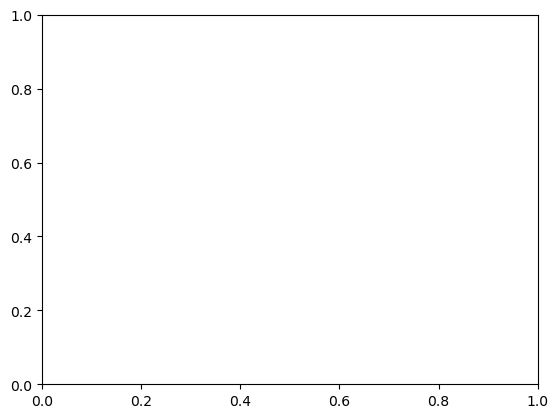

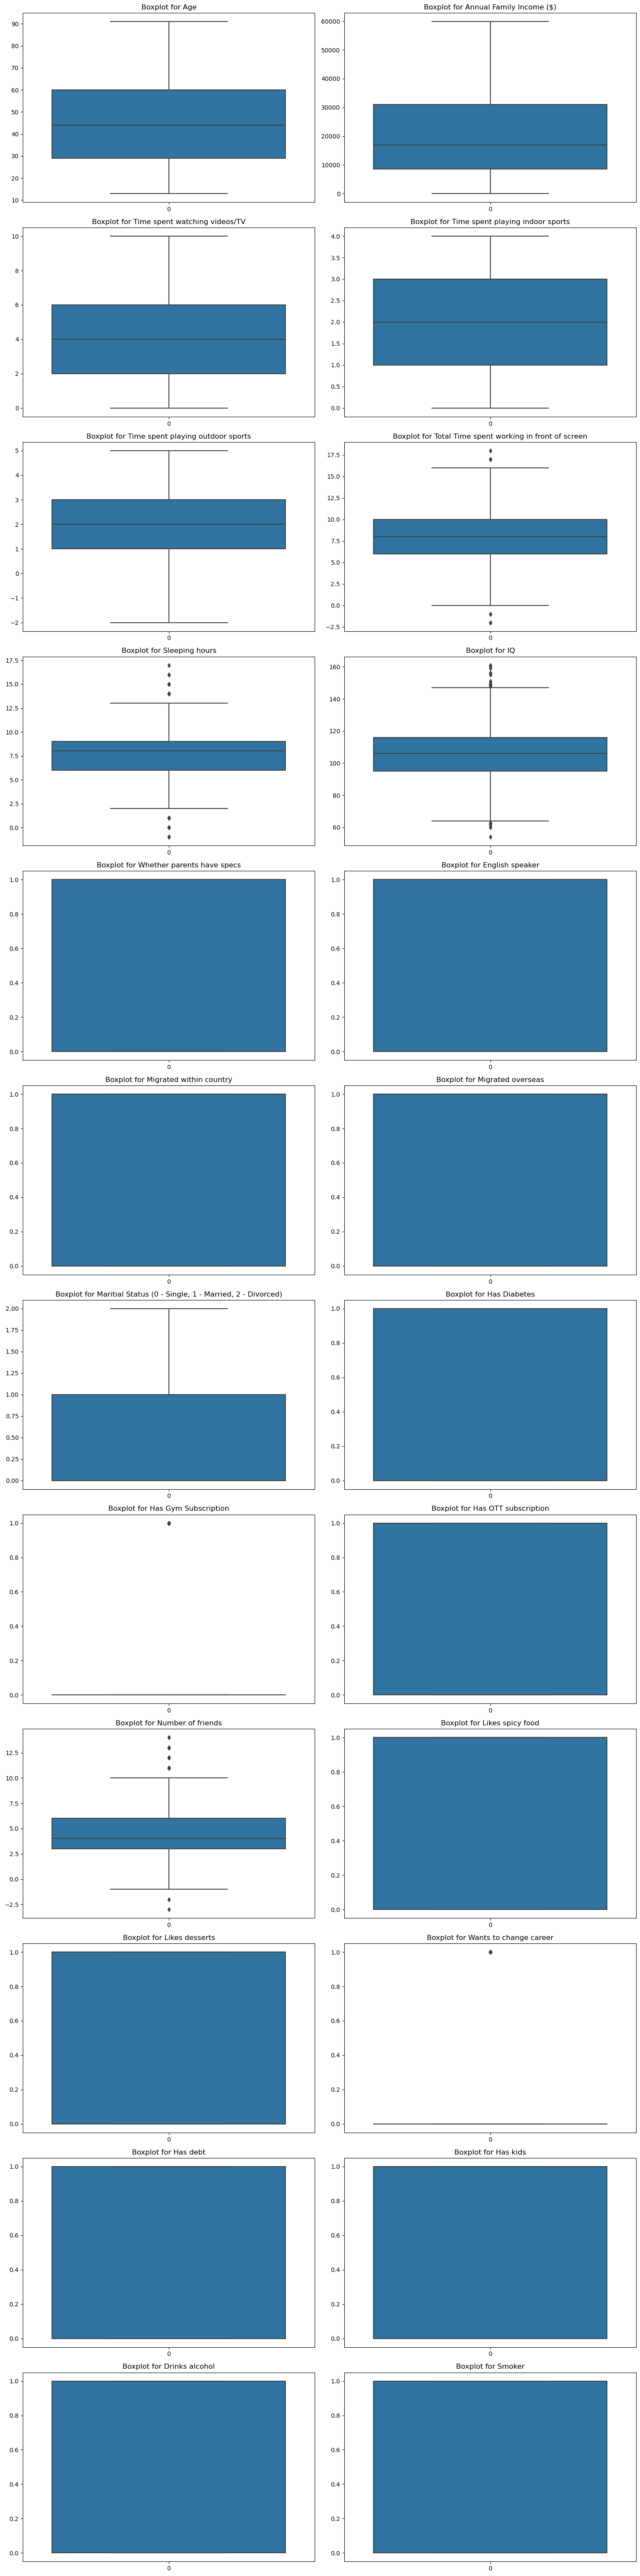

In [11]:
#Creating boxplots to visualize the summary statistics. 

n_cols = 2
n_rows = (len(numeric_cols) + n_cols -1) // n_cols

fig,axes = plt.subplots()

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_clean[col], ax=axes[i])  
    axes[i].set_title(f'Boxplot for {col}')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()  
plt.show()


Majority of the column's values are binary, therefore the boxplot does not provide meaningful insight into the distribution of the data

In [12]:
#Calculating outliers using the z-score

summary = {}
for column in numeric_cols :
    original_count = len(df_clean[column])
    z_score = ((df_clean[column] - df_clean[column].mean()) / df_clean[column].std())
    df_clean = df_clean[z_score < 3]
    outliers = sum(z_score >= 3)
    
    summary[column] = {
        'original_count' : original_count,
        'outliers_found' : outliers,
        'percentage_of_outliers' : (outliers / original_count) * 100, 
        'remaining_count' : len(df_clean[column])
    }
    summary_dataframe = pd.DataFrame(summary)
    
summary_dataframe.transpose()

,original_count,outliers_found,percentage_of_outliers,remaining_count
Age,3220.0,0.0,0.000000,3220.0
Annual Family Income ($),3220.0,0.0,0.000000,3220.0
Time spent watching videos/TV,3220.0,0.0,0.000000,3220.0
Time spent playing indoor sports,3220.0,0.0,0.000000,3220.0
Time spent playing outdoor sports,3220.0,0.0,0.000000,3220.0
Total Time spent working in front of screen,3220.0,6.0,0.186335,3214.0
Sleeping hours,3214.0,11.0,0.342253,3203.0
IQ,3203.0,6.0,0.187324,3197.0
Whether parents have specs,3197.0,0.0,0.000000,3197.0
English speaker,3197.0,0.0,0.000000,3197.0


In [13]:
#Dataframe info after handling outliers
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unique ID,3177.0,4.973325e+06,2.867488e+06,1683.0,2491909.0,5004569.0,7435408.0,9999011.0
Age,3177.0,4.491879e+01,1.899124e+01,13.0,29.0,44.0,60.0,91.0
Annual Family Income ($),3177.0,2.057444e+04,1.507753e+04,10.0,8391.0,17041.0,30964.0,59858.0
Time spent watching videos/TV,3177.0,4.351904e+00,2.804086e+00,0.0,2.0,4.0,6.0,10.0
Time spent playing indoor sports,3177.0,1.991816e+00,1.206326e+00,0.0,1.0,2.0,3.0,4.0
Time spent playing outdoor sports,3177.0,1.696884e+00,1.188089e+00,-2.0,1.0,2.0,3.0,5.0
Total Time spent working in front of screen,3177.0,8.145105e+00,2.734016e+00,-2.0,6.0,8.0,10.0,16.0
Sleeping hours,3177.0,7.626062e+00,2.220224e+00,-1.0,6.0,8.0,9.0,14.0
IQ,3177.0,1.059688e+02,1.524820e+01,54.0,95.0,106.0,116.0,151.0
Whether parents have specs,3177.0,3.349071e-01,4.720323e-01,0.0,0.0,0.0,1.0,1.0


Number of rows have decreased from 3220 to 3177 after data cleaning

##### Data Exploration

In [14]:
target_column = 'Wear Specs'
correlations = {}

# Calculate correlations
for col in numeric_cols: 
    correlation = df_clean[col].corr(df_clean[target_column])
    correlations[col] = round(correlation, 4)

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
top_7_correlations = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index).head(7)

print(f'Correlation between numeric columns and target: \n{correlation_df}')
print(' ')
print(f'Top 7 correlations to target column: \n{top_7_correlations}')


Correlation between numeric columns and target: 
                                              Feature  Correlation
0                                                 Age       0.2210
1                            Annual Family Income ($)       0.0890
2                       Time spent watching videos/TV       0.3407
3                    Time spent playing indoor sports       0.0510
4                   Time spent playing outdoor sports      -0.1795
5         Total Time spent working in front of screen       0.1395
6                                      Sleeping hours      -0.0739
7                                                  IQ       0.0914
8                          Whether parents have specs       0.1911
9                                     English speaker      -0.0924
10                            Migrated within country      -0.0573
11                                  Migrated overseas       0.0186
12  Maritial Status (0 - Single, 1 - Married, 2 - ...       0.0808
13           

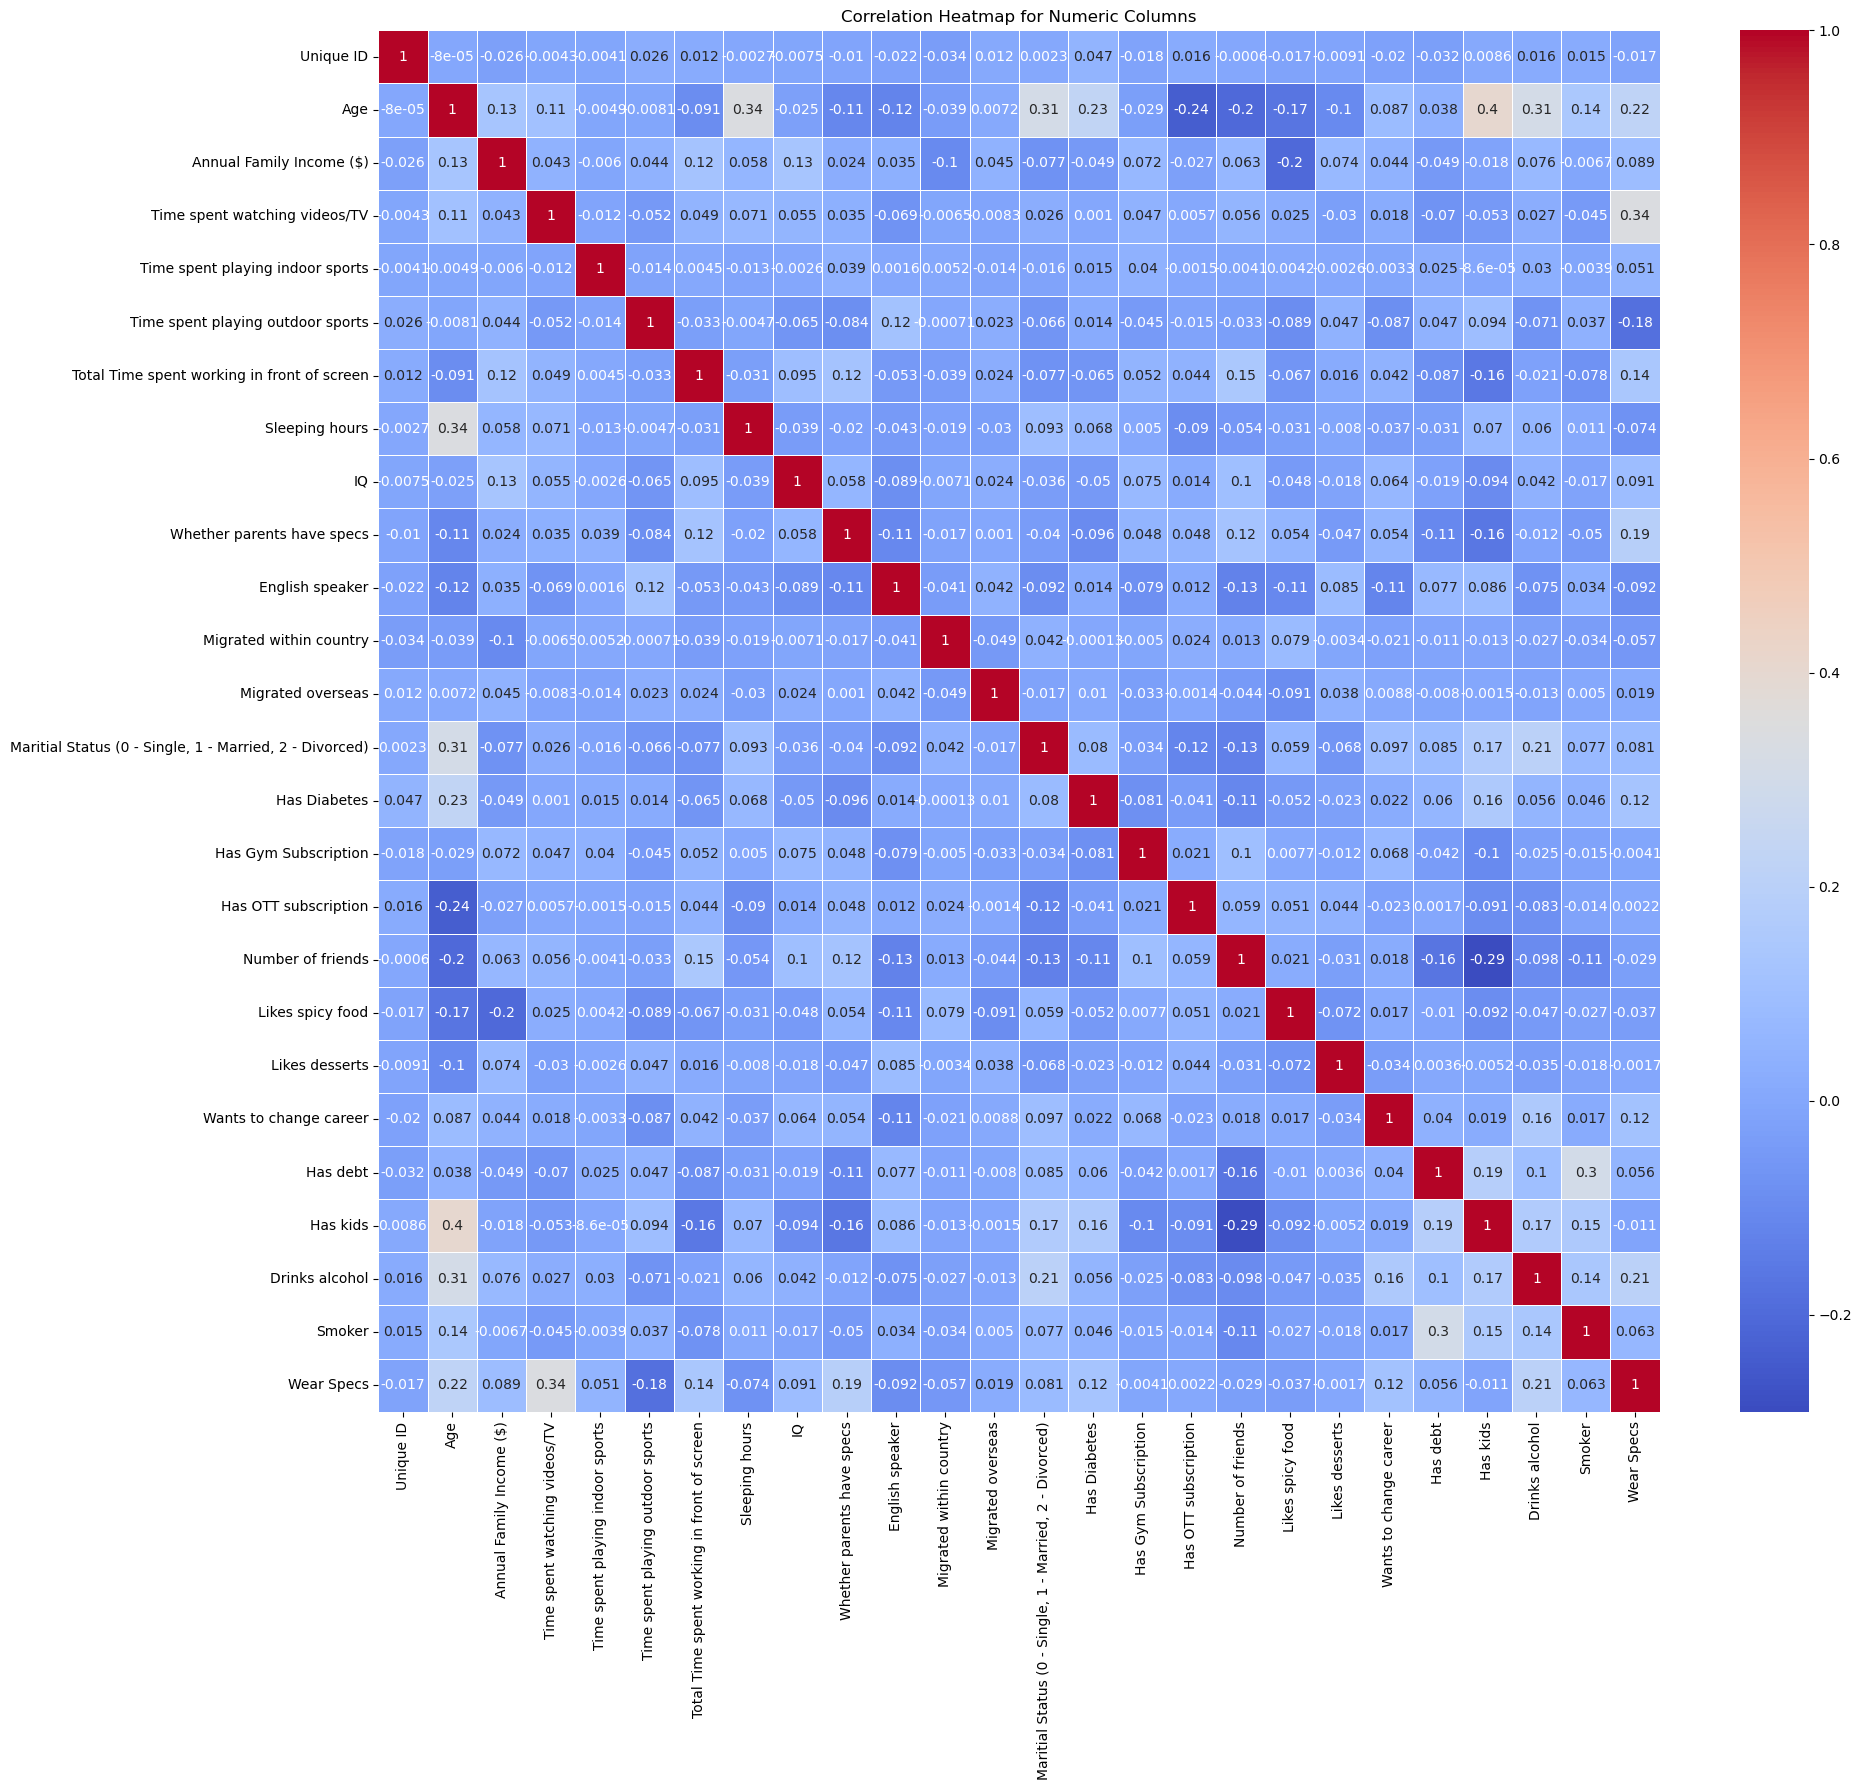

In [15]:
plt.figure(figsize=(20, 18))
correlation_matrix = df_clean[all_numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.tight_layout()
plt.show()

The analysis of these correlations indicates that factors such as screen time, age, and family history of wearing glasses are significant predictors of whether an individual wears specs.
Time Spent playing outdoor activity has a negative correlation to the target. This could indicate that active individuals may have better vision or that outdoor activities may reduce the risk of vision problems compared to sedentary behaviors.

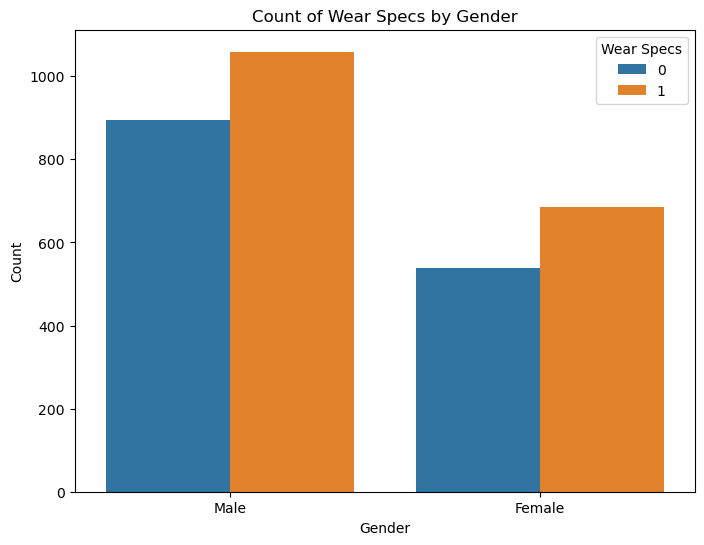

In [16]:
# Countplot for Gender vs. Wear Specs
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Wear Specs', data=df_clean)
plt.title('Count of Wear Specs by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Wear Specs', loc='upper right')
plt.show()

It appears that the dataset contains a higher count of males than females, and a larger number of males are reported to wear glasses.

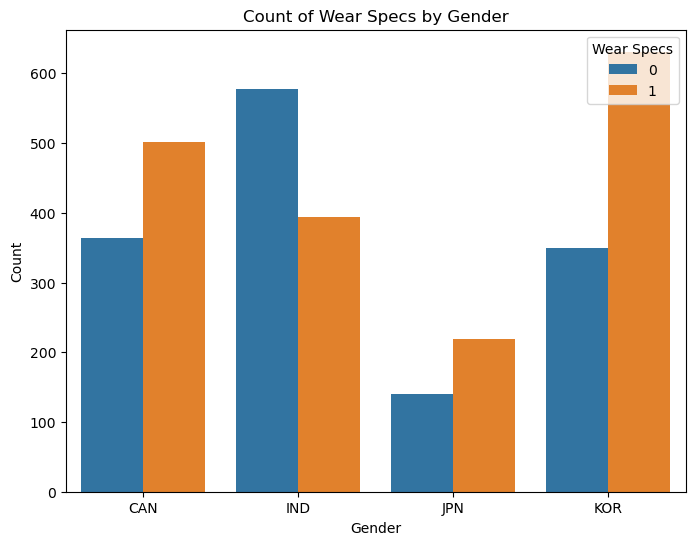

In [17]:
# Countplot for Country vs. Wear Specs
plt.figure(figsize=(8, 6))
sns.countplot(x='Country', hue='Wear Specs', data=df_clean)
plt.title('Count of Wear Specs by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Wear Specs', loc='upper right')
plt.show()

It appears Korea has a higher count of people who wear glasses ,and Japan has the least

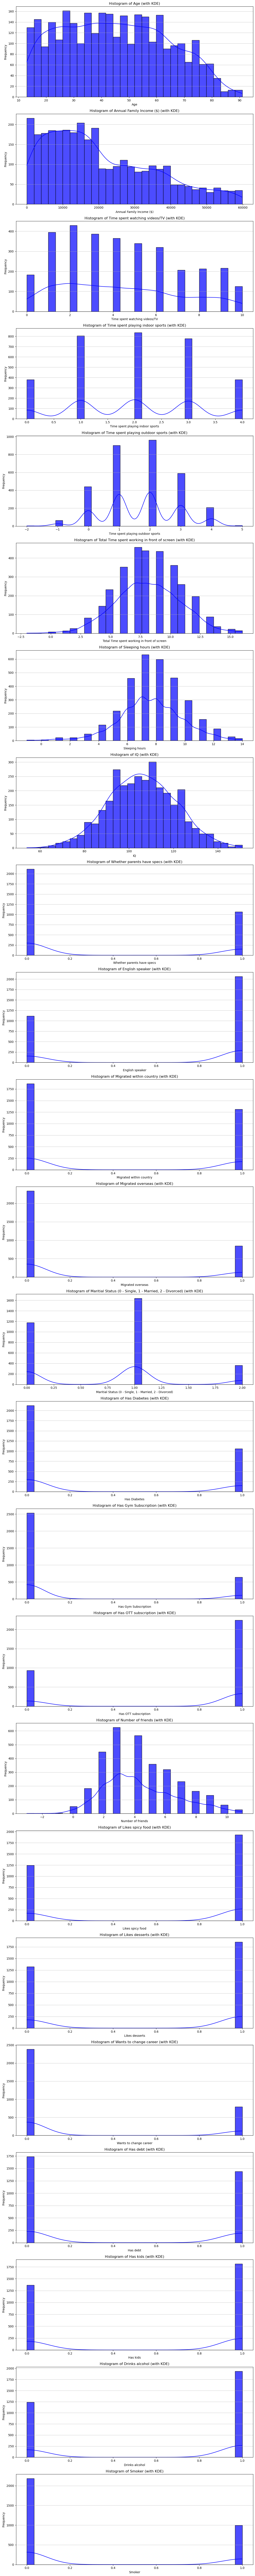

In [18]:
num_cols = len(numeric_cols)
plt.figure(figsize=(12, 5 * num_cols))  

# Loop through each numerical column and create a histogram
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_cols, 1, i)  
    sns.histplot(df_clean[col], bins=30, kde=True, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col} (with KDE)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

Columns with binary variables make it difficult to extract meaningful insights from them.

Number of friends, marital status, IQ, Sleeping hours and Total Hours spent working infront of screen appear to follow a normal distribution, indicating a symmetrical spread of values around the mean.

Age and Annual Family income exhibit a right skewness in the data